# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 11: Limpieza de Datos</center></h1>

Este ejercicio busca que los estudiantes aprendan a usar algunas de las librearías de Python y Pandas para limpiar datos crudos de un repositorio.

## 1. El problema con los datos

Volvamos un minuto a revisar los datos de los taxis en NYC y tratar de sacar algunas conclusiones. 

Supongamos que nuestro objetivo es ver cuantos viajes se hacen en la ciudad usando los taxis amarillos para un mes en particular, cosa de determinar si necesitamos más o menos taxis en algunas zonas de la ciudad.

In [2]:
import pyarrow.parquet as pq

# leer la base parquet
trips = pq.read_table('data\yellow_tripdata_2022-01.parquet')
# transformar a dataframe de pandas
trips = trips.to_pandas()
trips.info()

<>:4: SyntaxWarning: invalid escape sequence '\y'
<>:4: SyntaxWarning: invalid escape sequence '\y'
C:\Users\User\AppData\Local\Temp\ipykernel_21572\3449267836.py:4: SyntaxWarning: invalid escape sequence '\y'
  trips = pq.read_table('data\yellow_tripdata_2022-01.parquet')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Ahora que tenemos los datos en un DataFrame, podemos rápidamente saber la cantidad de viajes por zona agrupando como lo hicimos antes y contando la cantidad de registros.

In [3]:
trips_by_loc = trips[["PULocationID"]].groupby("PULocationID").size()
trips_by_loc.sort_values()

PULocationID
176         1
27          1
172         1
105         1
187         1
        ...  
186     80580
161     88237
132    103485
236    120814
237    121630
Length: 257, dtype: int64

Con este simple cálculo podemos concluir que las zonas 237, 236, 132, 161 y 186 son las más usadas para tomar taxi, mientras las zonas 176, 27, 172, 105 y 187 son las menos usadas en ese mes. Pero, ¿está correcto lo que hicimos?

In [4]:
trips[trips["PULocationID"] == 187]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2429908,2,2022-01-20 20:48:51,2022-01-20 21:35:53,NaN,28.23,NaN,None,187,247,0,86.15,0.0,0.5,0.0,6.55,0.3,96.0,NaN,NaN


In [5]:
trips[trips["PULocationID"] == 237]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
17,1,2022-01-01 00:53:54,2022-01-01 01:05:20,2.0,2.20,1.0,N,237,107,1,9.50,2.5,0.5,2.55,0.00,0.3,15.35,2.5,0.0
29,1,2022-01-01 00:23:54,2022-01-01 00:28:42,2.0,0.80,1.0,N,237,237,4,5.50,3.0,0.5,0.00,0.00,0.3,9.30,2.5,0.0
64,2,2022-01-01 00:59:01,2022-01-01 01:12:34,2.0,2.27,1.0,N,237,233,1,11.50,0.5,0.5,4.59,0.00,0.3,19.89,2.5,0.0
66,2,2022-01-01 00:13:17,2022-01-01 00:18:10,1.0,1.14,1.0,N,237,236,2,6.00,0.5,0.5,0.00,0.00,0.3,9.80,2.5,0.0
153,2,2022-01-01 00:58:21,2022-01-01 01:21:54,1.0,8.54,1.0,N,237,196,1,27.50,0.5,0.5,7.57,6.55,0.3,45.42,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463689,2,2022-01-31 21:14:00,2022-01-31 21:29:00,NaN,4.17,NaN,None,237,226,0,16.90,0.0,0.5,1.00,0.00,0.3,21.20,NaN,NaN
2463830,2,2022-01-31 22:34:18,2022-01-31 22:50:14,NaN,2.77,NaN,None,237,48,0,11.14,0.0,0.5,3.09,0.00,0.3,17.53,NaN,NaN
2463843,1,2022-01-31 22:35:22,2022-01-31 22:44:20,NaN,1.90,NaN,None,237,239,0,8.50,0.5,0.5,1.23,0.00,0.3,13.53,NaN,NaN
2463883,2,2022-01-31 23:09:29,2022-01-31 23:19:18,NaN,2.28,NaN,None,237,239,0,10.51,0.0,0.5,2.95,0.00,0.3,16.76,NaN,NaN


In [6]:
trips[(trips["PULocationID"] == 237) & (trips["passenger_count"] >= 1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
17,1,2022-01-01 00:53:54,2022-01-01 01:05:20,2.0,2.20,1.0,N,237,107,1,9.5,2.5,0.5,2.55,0.00,0.3,15.35,2.5,0.0
29,1,2022-01-01 00:23:54,2022-01-01 00:28:42,2.0,0.80,1.0,N,237,237,4,5.5,3.0,0.5,0.00,0.00,0.3,9.30,2.5,0.0
64,2,2022-01-01 00:59:01,2022-01-01 01:12:34,2.0,2.27,1.0,N,237,233,1,11.5,0.5,0.5,4.59,0.00,0.3,19.89,2.5,0.0
66,2,2022-01-01 00:13:17,2022-01-01 00:18:10,1.0,1.14,1.0,N,237,236,2,6.0,0.5,0.5,0.00,0.00,0.3,9.80,2.5,0.0
153,2,2022-01-01 00:58:21,2022-01-01 01:21:54,1.0,8.54,1.0,N,237,196,1,27.5,0.5,0.5,7.57,6.55,0.3,45.42,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392089,2,2022-01-31 23:15:37,2022-01-31 23:29:34,1.0,6.26,1.0,N,237,87,1,19.5,0.5,0.5,4.66,0.00,0.3,27.96,2.5,0.0
2392124,1,2022-01-31 23:17:30,2022-01-31 23:28:17,1.0,1.30,1.0,N,237,140,1,8.0,3.0,0.5,1.50,0.00,0.3,13.30,2.5,0.0
2392208,2,2022-01-31 23:34:18,2022-01-31 23:42:15,1.0,1.98,1.0,N,237,263,1,8.0,0.5,0.5,2.36,0.00,0.3,14.16,2.5,0.0
2392217,2,2022-01-31 23:56:14,2022-02-01 00:06:17,1.0,1.84,1.0,N,237,238,1,9.5,0.5,0.5,2.66,0.00,0.3,15.96,2.5,0.0


In [7]:
trips["trip_distance"].sort_values()


487702          0.00
896412          0.00
449383          0.00
787720          0.00
309150          0.00
             ...    
2398837    193150.52
2419139    201283.16
2461083    250984.47
2429597    274658.81
2409416    306159.28
Name: trip_distance, Length: 2463931, dtype: float64

Claramente tenemos un gran número de registros con problemas y por ende no podemos confiar en el resumen que hicismos antes para definir algo. Necesitamos limpiar los datos que tienen problemas.

In [8]:
viajes_limpios = trips[(trips["passenger_count"] >= 1) & (trips["trip_distance"] > 0) & (trips["tpep_pickup_datetime"].dt.month == 1)]
len(viajes_limpios)

2313535

In [9]:
trips_by_loc = viajes_limpios[["PULocationID"]].groupby("PULocationID").size()
trips_by_loc.sort_values()

PULocationID
176         1
214         1
27          1
206         1
105         1
        ...  
186     77441
161     84622
132     99617
236    114593
237    116329
Length: 253, dtype: int64

***Desafio:*** Crear columna velocidad - Limpiar datos con velocidad ridicula

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

velocidad_df = deepcopy(viajes_limpios)



velocidad_df['duration_hours'] = (velocidad_df['tpep_dropoff_datetime'] - velocidad_df['tpep_pickup_datetime']).dt.total_seconds() / 3600

velocidad_df = velocidad_df[(velocidad_df['duration_hours'] > 0) & (velocidad_df['duration_hours'] < 10)] # Limpiamos a tiempo con sentido

velocidad_df['speed_mph'] = round(velocidad_df['trip_distance'] / velocidad_df['duration_hours']) # Redondeamos para sacar una idea

velocidad_df['speed_mph'].sort_values() # Encontramos que existen valore negativos e infinitos (division por 0)


1833014        0.0
1990446        0.0
1287485        0.0
1590028        0.0
2367441        0.0
            ...   
1180713    30906.0
2299402    31230.0
188670     31500.0
124433     38400.0
1924858    56844.0
Name: speed_mph, Length: 2310954, dtype: float64

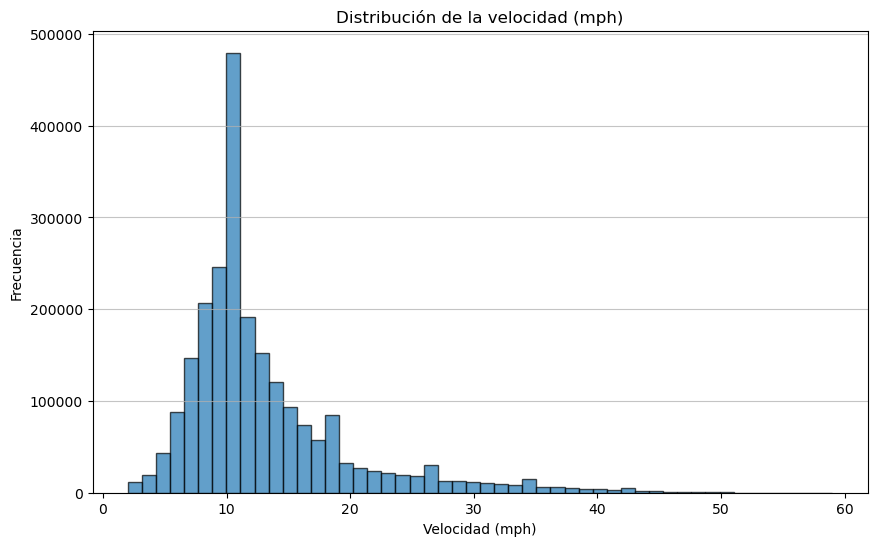

In [48]:
# Eliminamos estso valores
speed_limpia = velocidad_df[np.isfinite(velocidad_df['speed_mph'])]['speed_mph']
# De los valores finitos, seleccionamos solo los que son mayores a 0
speed_limpia = speed_limpia[speed_limpia > 1]
speed_limpia = speed_limpia[speed_limpia < 200]
#dejamos un maximo "razonable" (320 km/h)

velocidad_filtrada = velocidad_df[(velocidad_df['speed_mph'] > 1) & (velocidad_df['speed_mph'] < 60)]['speed_mph']
#60 mph = 96 km/h

plt.figure(figsize=(10, 6))
plt.hist(velocidad_filtrada, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribución de la velocidad (mph)')
plt.xlabel('Velocidad (mph)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [49]:
max_speed = speed_limpia.max()
print(max_speed) # Existe un taxi que tiene viajes a esa velocidad
velocidad_df[velocidad_df['speed_mph'] == max_speed] # Podemos ver que paso y obtener el id del taxi


199.0


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_hours,speed_mph
929556,1,2022-01-13 21:10:33,2022-01-13 21:11:11,1.0,2.1,1.0,Y,229,229,2,...,3.0,0.5,0.0,0.0,0.3,6.3,2.5,0.0,0.010556,199.0
1890920,1,2022-01-25 16:55:18,2022-01-25 16:55:47,1.0,1.6,1.0,N,145,145,2,...,1.0,0.5,0.0,0.0,0.3,4.3,0.0,0.0,0.008056,199.0


## 2. Ejemplo de limpieza de Datos.

El set de datos que utilizaremos en este ejercicio proviene de la página `insideairbnb.com`, un grupo de lobby anti-Airbnb que hace scraping de las propiedades publicadas en distintas ciudades del mundo, para estudiar el impacto que esta plataforma tiene sobre los barrios y el desarrollo urbano. En este caso, procesaremos el dataset de propiedades disponibles en Santiago de Chile (actualizado al 28 de junio de 2023):

http://insideairbnb.com/index.html

In [12]:
# lectura de datos
import pandas as pd

df0 = pd.read_csv('data\listings.csv')
df0.head()

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_21572\3348141892.py:4: SyntaxWarning: invalid escape sequence '\l'
  df0 = pd.read_csv('data\listings.csv')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,770971877915057044,https://www.airbnb.com/rooms/770971877915057044,20230628025525,2023-06-28,previous scrape,Home in Las Condes · 1 bedroom · 1 bed · 1 pri...,Dormitorio en el primer piso con baño privado ...,NaN,https://a0.muscache.com/pictures/c23b8b00-aae8...,365532508,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,760282894651545802,https://www.airbnb.com/rooms/760282894651545802,20230628025525,2023-06-28,previous scrape,Rental unit in Santiago · ★4.63 · 1 bedroom · ...,Disfruta del fácil acceso a todo desde este al...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,95873591,...,4.81,4.81,4.81,NaN,f,3,3,0,0,2.23
2,51868986,https://www.airbnb.com/rooms/51868986,20230628025525,2023-06-28,city scrape,Rental unit in Providencia · ★4.55 · 1 bedroom...,NaN,NaN,https://a0.muscache.com/pictures/855ada98-d368...,249113475,...,4.48,4.93,4.48,NaN,f,21,21,0,0,1.39
3,17791924,https://www.airbnb.com/rooms/17791924,20230628025525,2023-06-28,city scrape,Rental unit in Vitacura · ★4.95 · 1 bedroom · ...,** Alquiler MENSUAL disponible con dcto<br /><...,"Located in VITACURA, the upper side of the cit...",https://a0.muscache.com/pictures/4e5a0a16-b0c7...,3282957,...,5.00,4.97,4.92,NaN,f,2,2,0,0,0.50
4,38815415,https://www.airbnb.com/rooms/38815415,20230628025525,2023-06-28,city scrape,Rental unit in Santiago · 1 bedroom · 1 bed · ...,"Buena Ubicación, metro Cumming, departamento c...",NaN,https://a0.muscache.com/pictures/ffaaf578-3455...,296973826,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.04


## 2. Cambios en columnas

Revisemos cómo trabajar sobre las columnas del DataFrame

In [13]:
df0.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### 2.1 Seleccionando algunas columnas

Podemos generar filtros que nos permiten seleccionar las columnas de interés para el trabajo posterior.

In [14]:
# columnas a dejar
keep_cols = ['id','name','host_id','neighbourhood_group_cleansed','neighbourhood', 'minimum_nights', 'latitude','longitude','price','number_of_reviews']
# nuevo dataframe con las columnas seleccionadas
df = df0[keep_cols]
df.head(10)

,id,name,host_id,neighbourhood_group_cleansed,neighbourhood,minimum_nights,latitude,longitude,price,number_of_reviews
0,770971877915057044,Home in Las Condes · 1 bedroom · 1 bed · 1 pri...,365532508,NaN,NaN,1,-33.407580,-70.511020,"$80,000.00",0
1,760282894651545802,Rental unit in Santiago · ★4.63 · 1 bedroom · ...,95873591,NaN,NaN,5,-33.436793,-70.654233,"$19,000.00",16
2,51868986,Rental unit in Providencia · ★4.55 · 1 bedroom...,249113475,NaN,NaN,1,-33.429850,-70.618290,"$48,888.00",29
3,17791924,Rental unit in Vitacura · ★4.95 · 1 bedroom · ...,3282957,NaN,"Vitacura, Región Metropolitana, Chile",3,-33.404960,-70.593780,"$120,000.00",38
4,38815415,Rental unit in Santiago · 1 bedroom · 1 bed · ...,296973826,NaN,NaN,1,-33.438070,-70.671030,"$24,000.00",2
5,638289642039355609,Rental unit in Providencia · ★4.87 · 1 bedroom...,29662222,NaN,NaN,1,-33.428753,-70.618607,"$44,000.00",30
6,825441478165261287,Rental unit in Lo Barnechea · ★New · 2 bedroom...,395956703,NaN,NaN,1,-33.354820,-70.507895,"$40,000.00",0
7,6738951,Loft in Recoleta · ★4.88 · 1 bedroom · 1 bed ·...,35289741,NaN,"Recoleta, Región Metropolitana, Chile",2,-33.430790,-70.636150,"$43,000.00",218
8,828348698908291165,Rental unit in Recoleta · ★4.29 · 1 bedroom · ...,131488797,NaN,NaN,1,-33.432842,-70.647256,"$29,614.00",7
9,560253890745623914,Vacation home in Santiago · ★4.42 · 2 bedrooms...,62636888,NaN,NaN,1,-33.448980,-70.635520,"$51,000.00",24


### 2.2 Eliminando columnas

En el dataframe anterior notamos que la columna `neighbourhood_group_cleansed` no nos enterga información, por lo que la podemos eliminar.

In [15]:
df = df.drop(columns=['neighbourhood_group_cleansed'])
df.head()

,id,name,host_id,neighbourhood,minimum_nights,latitude,longitude,price,number_of_reviews
0,770971877915057044,Home in Las Condes · 1 bedroom · 1 bed · 1 pri...,365532508,NaN,1,-33.407580,-70.511020,"$80,000.00",0
1,760282894651545802,Rental unit in Santiago · ★4.63 · 1 bedroom · ...,95873591,NaN,5,-33.436793,-70.654233,"$19,000.00",16
2,51868986,Rental unit in Providencia · ★4.55 · 1 bedroom...,249113475,NaN,1,-33.429850,-70.618290,"$48,888.00",29
3,17791924,Rental unit in Vitacura · ★4.95 · 1 bedroom · ...,3282957,"Vitacura, Región Metropolitana, Chile",3,-33.404960,-70.593780,"$120,000.00",38
4,38815415,Rental unit in Santiago · 1 bedroom · 1 bed · ...,296973826,NaN,1,-33.438070,-70.671030,"$24,000.00",2


### 2.3 Tipos de Datos

Otro métido importante que usaremos la clase próxima nos permite ver el tipo de dato que hay en cada columna.

In [16]:
df.dtypes

id                     int64
name                  object
host_id                int64
neighbourhood         object
minimum_nights         int64
latitude             float64
longitude            float64
price                 object
number_of_reviews      int64
dtype: object

In [17]:
df['minimum_nights'].describe()

count    10554.000000
mean         6.956983
std         35.162220
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1124.000000
Name: minimum_nights, dtype: float64

In [18]:
df['minimum_nights'] = df['minimum_nights'].astype('category')

In [19]:
df['minimum_nights'].dtype

CategoricalDtype(categories=[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
                    12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
                    22,   23,   25,   28,   29,   30,   31,   33,   35,   38,
                    40,   45,   50,   53,   55,   59,   60,   61,   70,   85,
                    89,   90,   91,  100,  120,  133,  150,  155,  179,  180,
                   183,  200,  210,  295,  300,  304,  360,  365,  500,  999,
                  1000, 1124],
, ordered=False, categories_dtype=int64)

In [20]:
df['minimum_nights'].describe()

count     10554
unique       62
top           1
freq       4134
Name: minimum_nights, dtype: int64